<h1 align='center' style='color:red'>Water Quality prediction</h1>

### Task 1: Importing libraries and Exploring the Dataset.

### Task 2: Definining Exploratory Data Analysis with an overview of the whole project .

### Task 3: Checking missing values and Outliers & Creating visual methods to analyze the data.

### Task 4: creat a model that fits the data

### Task 5: creating an accurecy table


![separator2](https://i.imgur.com/4gX5WFr.png)

# Task 1: Importing libraries and Exploring the Dataset.
**` _________________________________________________________________________________________________________________`**

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize': [15, 15]},font_scale=1)

In [3]:
df = pd.read_csv('data set.csv')

In [4]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000



![separator2](https://i.imgur.com/4gX5WFr.png)

# Task 2: Definining EDA with an overview of the whole project 
**` _________________________________________________________________________________________________________________`**

## 2.1 Dependent Column : Potability , Independent columns : all other colums

**` _________________________________________________________________________________________________________________`**

## 2.2 Columns analysis

In [6]:
df.shape

(3276, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [8]:
missing_data_in_columns = pd.DataFrame({'total_missing': df.isnull().sum(), 'perc_missing': (df.isnull().mean())*100})
missing_data_in_columns

,total_missing,perc_missing
ph,491,14.987790
Hardness,0,0.000000
Solids,0,0.000000
Chloramines,0,0.000000
Sulfate,781,23.840049
Conductivity,0,0.000000
Organic_carbon,0,0.000000
Trihalomethanes,162,4.945055
Turbidity,0,0.000000
Potability,0,0.000000


> ### 2.2 Conclusions : 
> - **each column has only numbers** 
> - **columns data type are suitable**
> - **there are some nulls should be handled**

**` _________________________________________________________________________________________________________________`**

![separator2](https://i.imgur.com/4gX5WFr.png)

# Task 3: Preprocessing & Visualization
**` _________________________________________________________________________________________________________________`**

## 3.1 Outlires

In [9]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [10]:
columns = ['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes',
           'Turbidity']

In [11]:
columns

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity']

In [12]:
df.shape

(3276, 10)

### ❱ `Box blot for each column before removing outlires`

<AxesSubplot:xlabel='ph'>

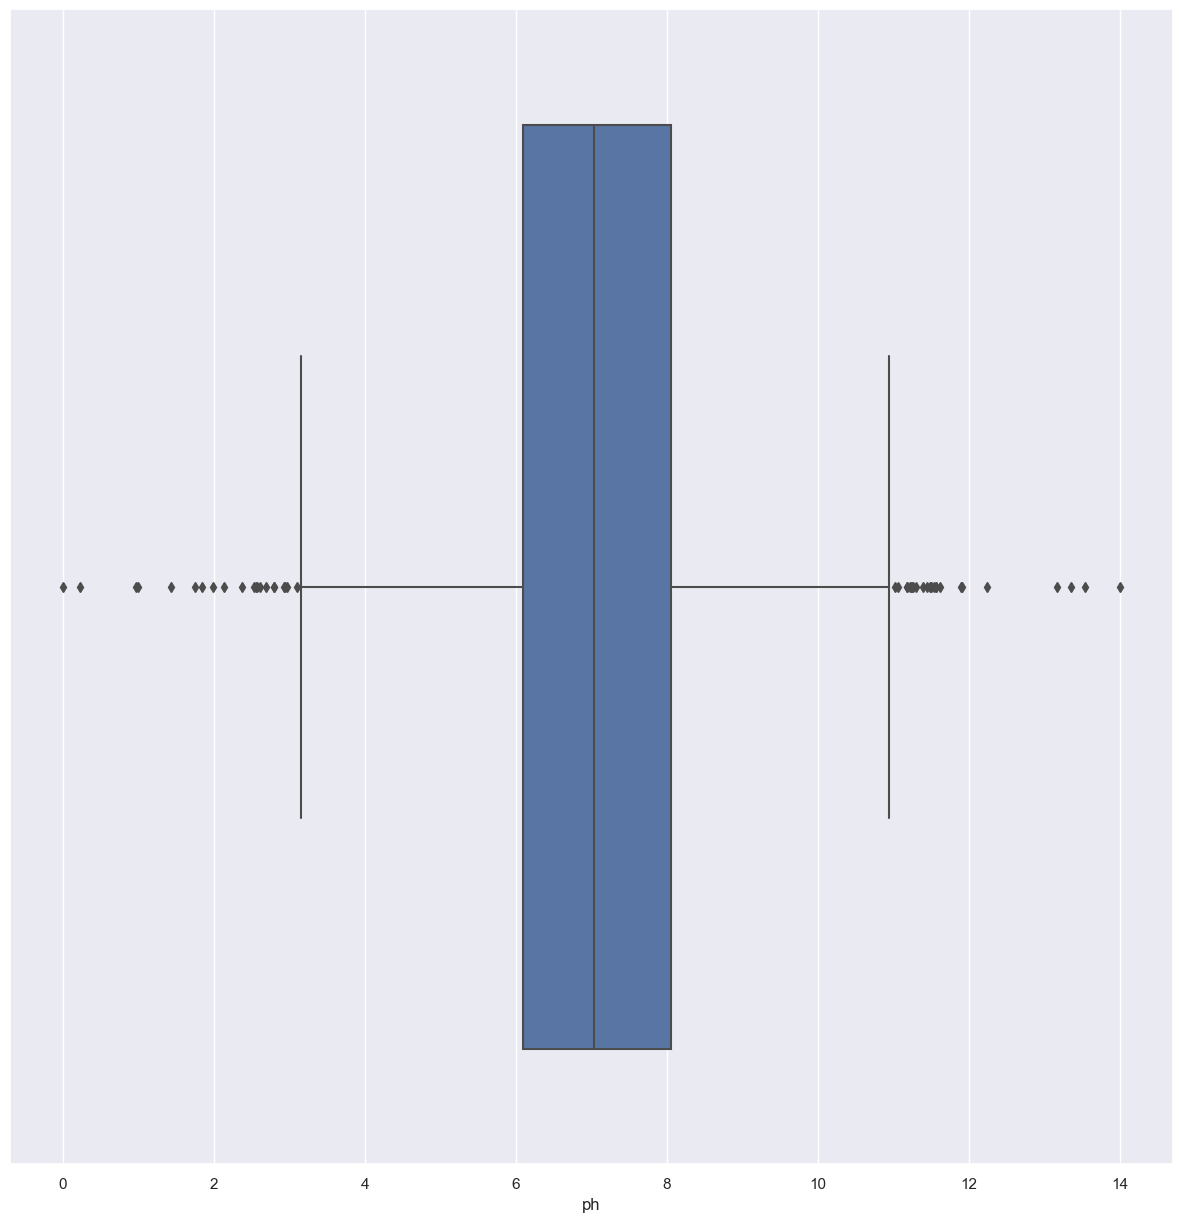

In [13]:
sns.boxplot(df['ph'])

<AxesSubplot:xlabel='Hardness'>

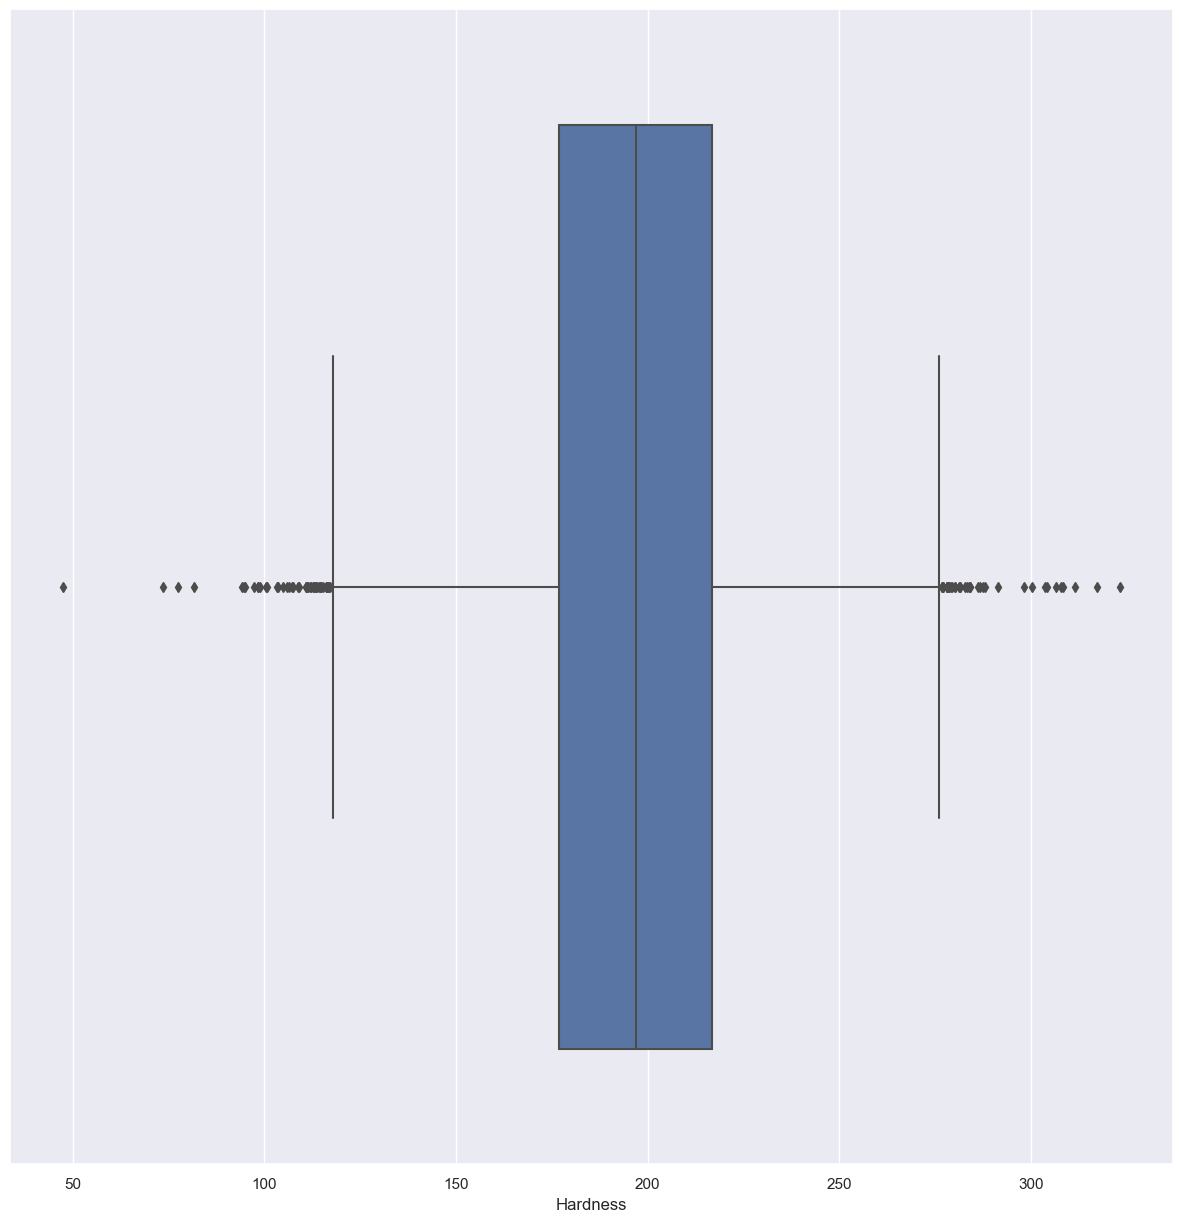

In [14]:
sns.boxplot(df['Hardness'])

<AxesSubplot:xlabel='Solids'>

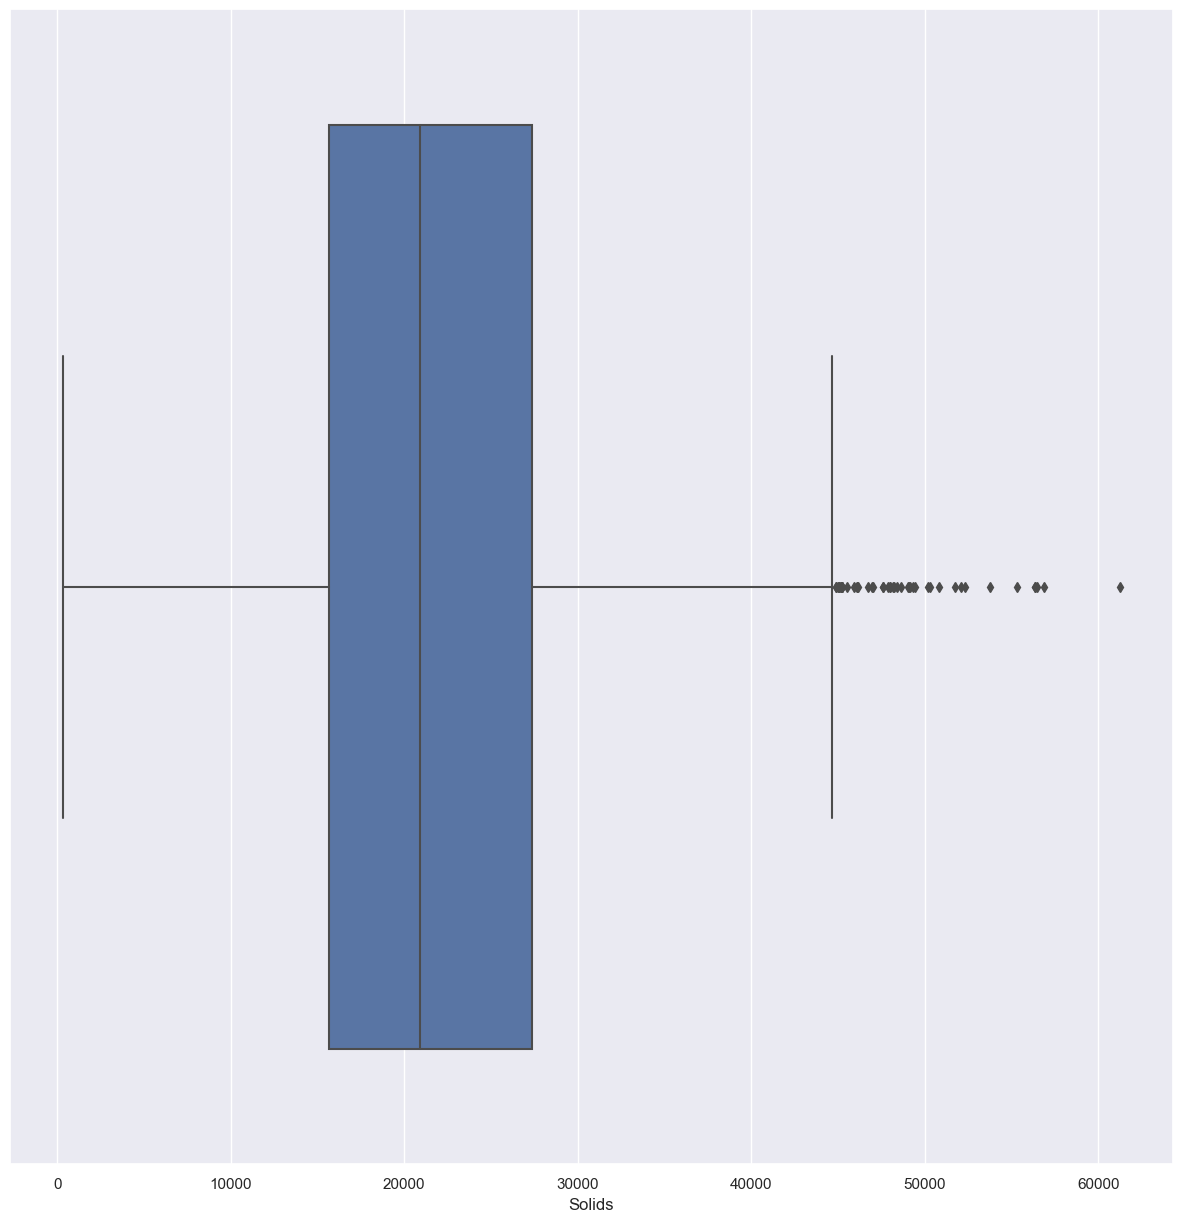

In [15]:
sns.boxplot(df['Solids'])

<AxesSubplot:xlabel='Chloramines'>

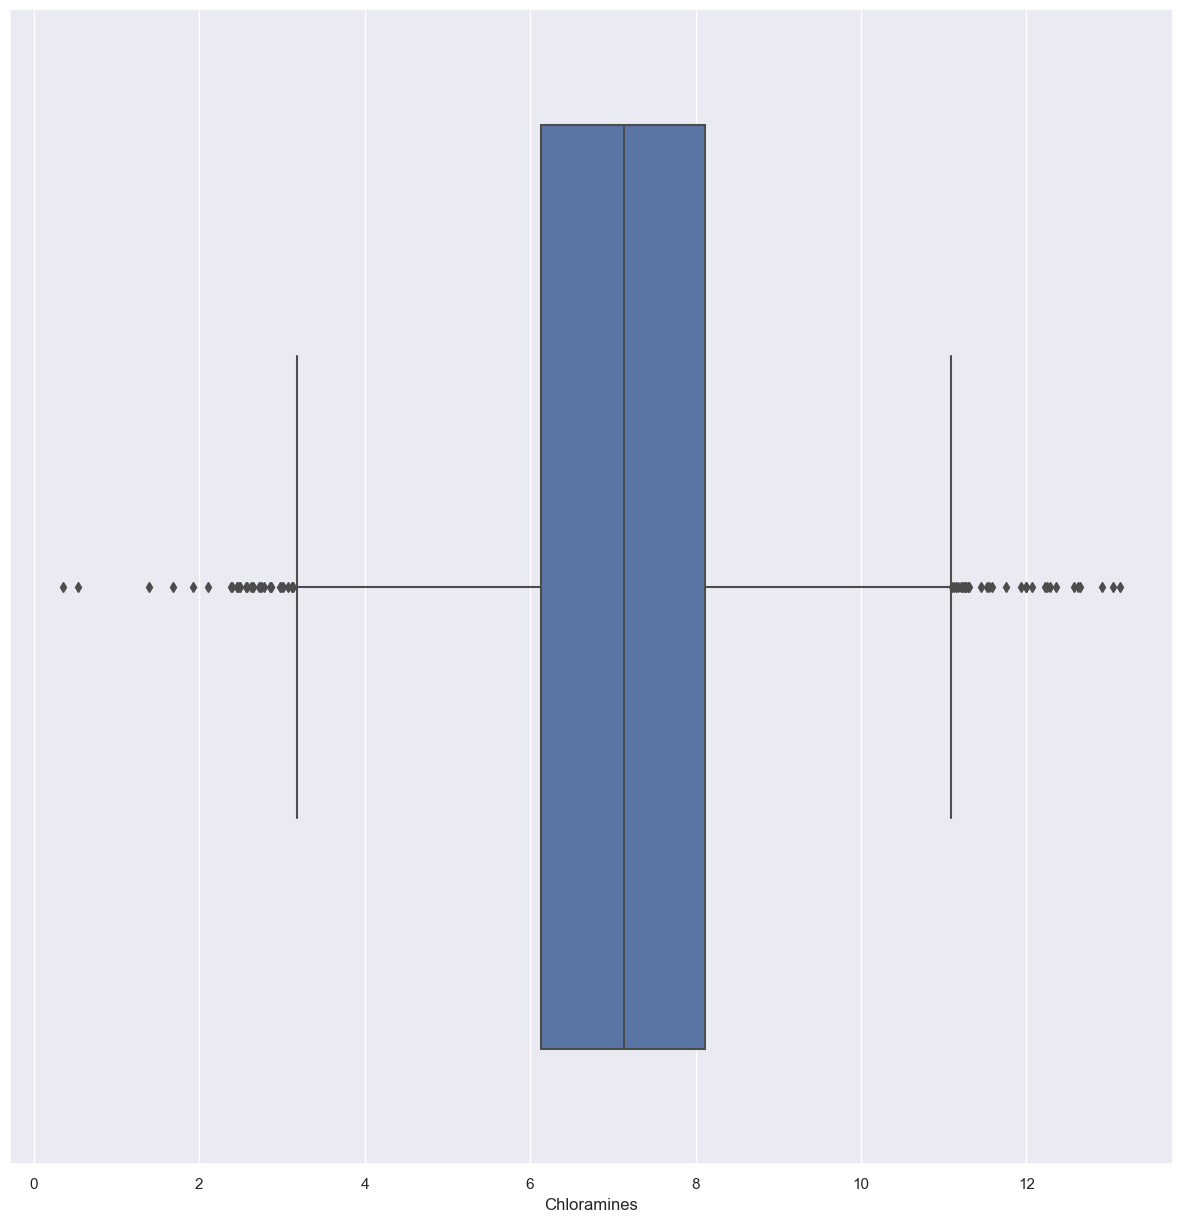

In [16]:
sns.boxplot(df['Chloramines'])

<AxesSubplot:xlabel='Sulfate'>

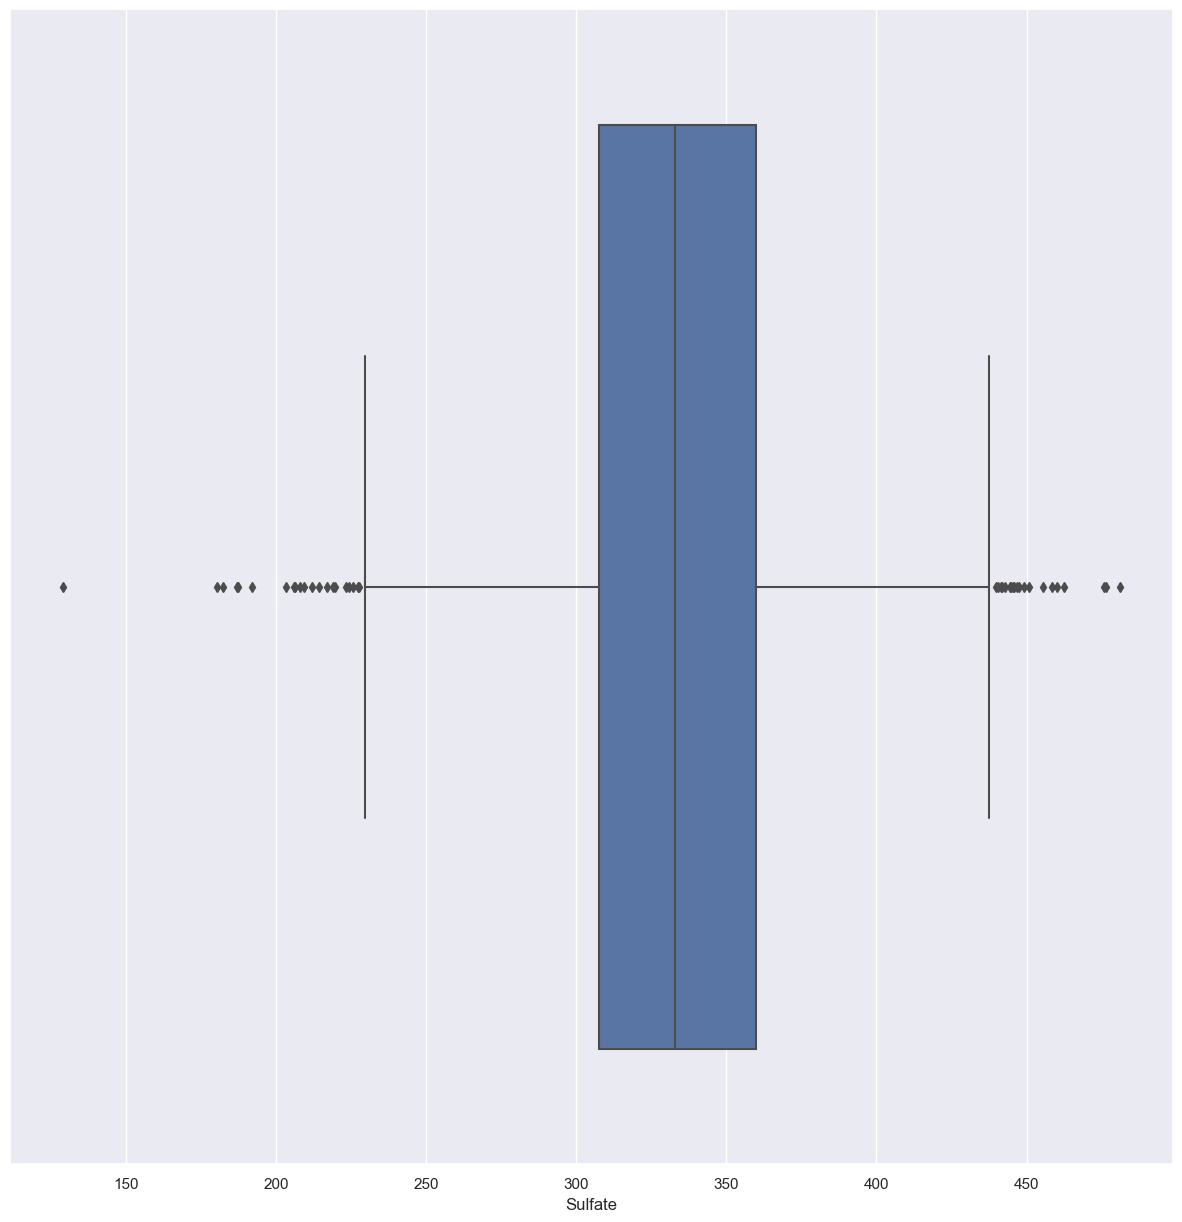

In [17]:
sns.boxplot(df['Sulfate'])

<AxesSubplot:xlabel='Conductivity'>

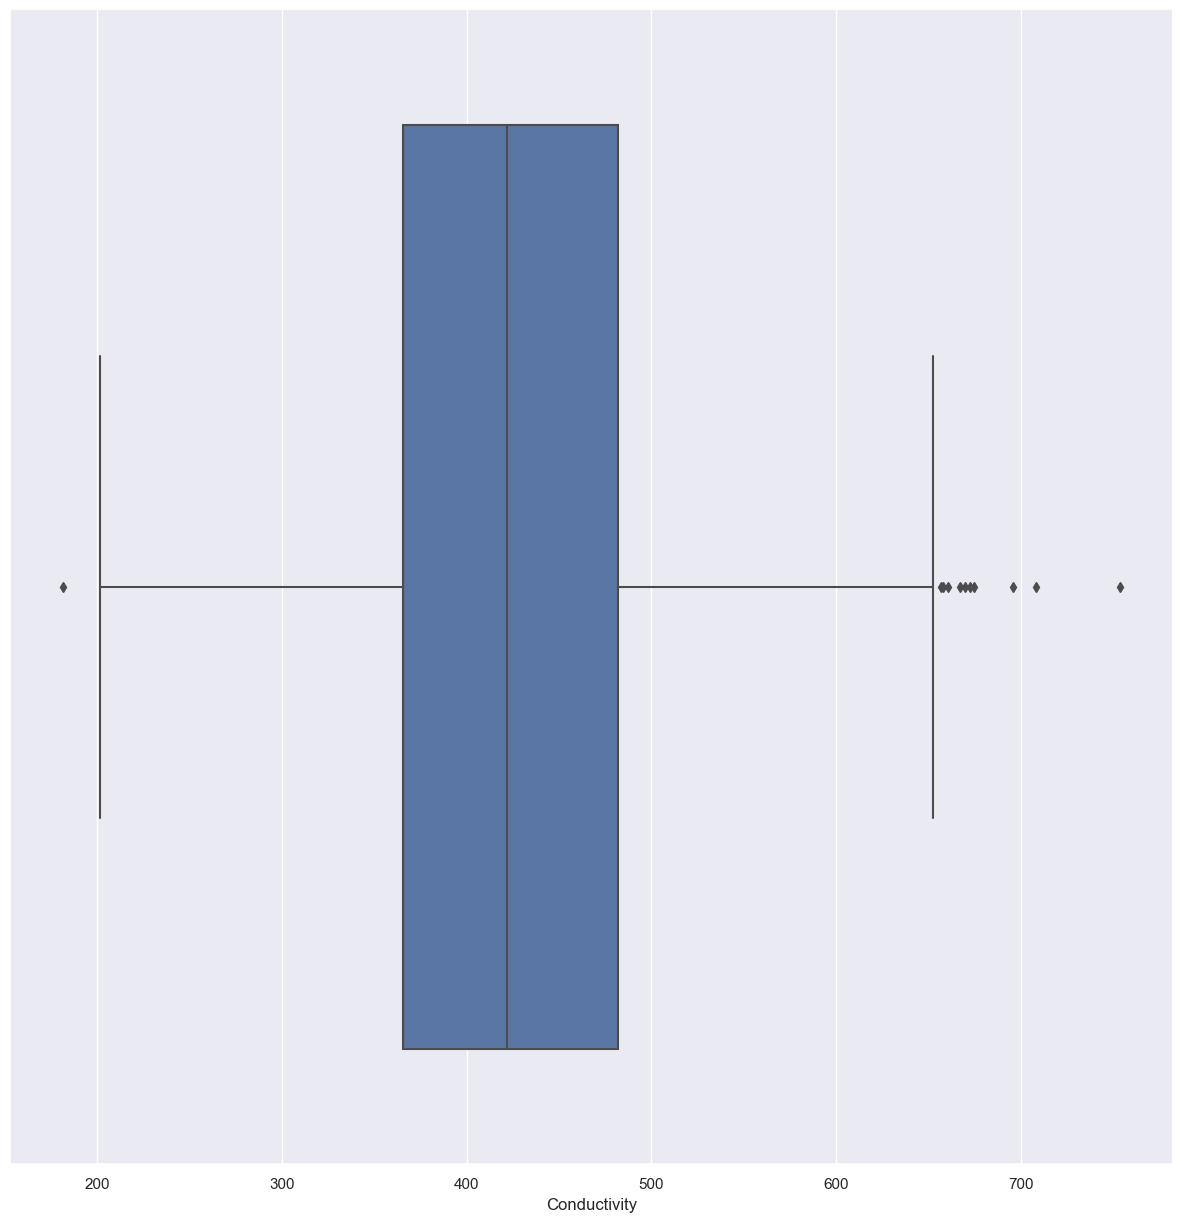

In [18]:
sns.boxplot(df['Conductivity'])

<AxesSubplot:xlabel='Organic_carbon'>

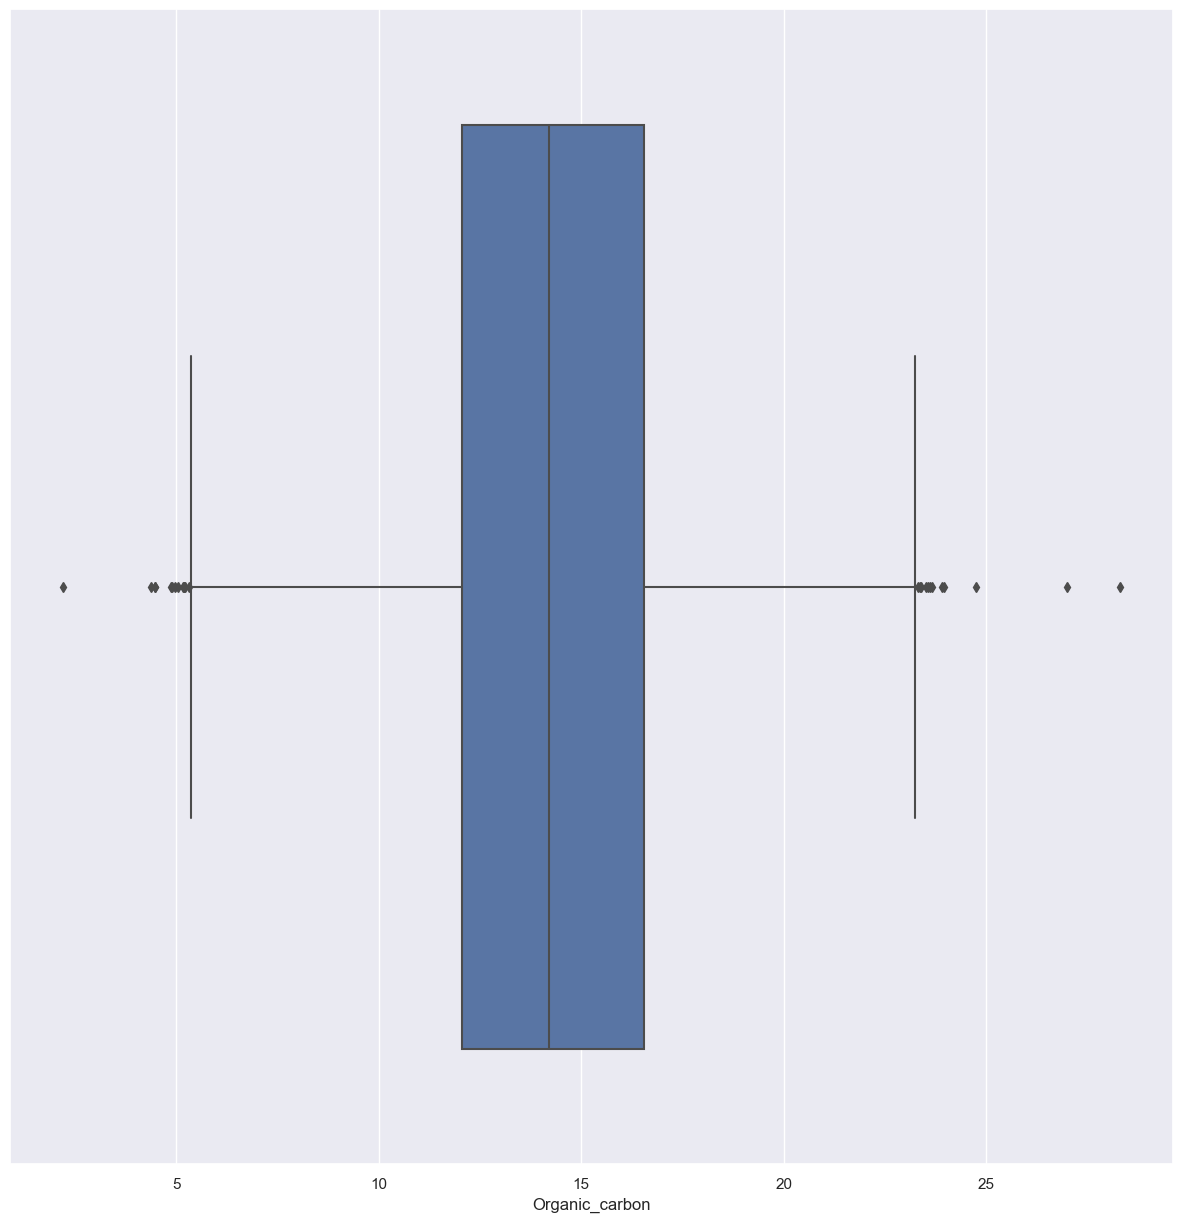

In [19]:
sns.boxplot(df['Organic_carbon'])

<AxesSubplot:xlabel='Trihalomethanes'>

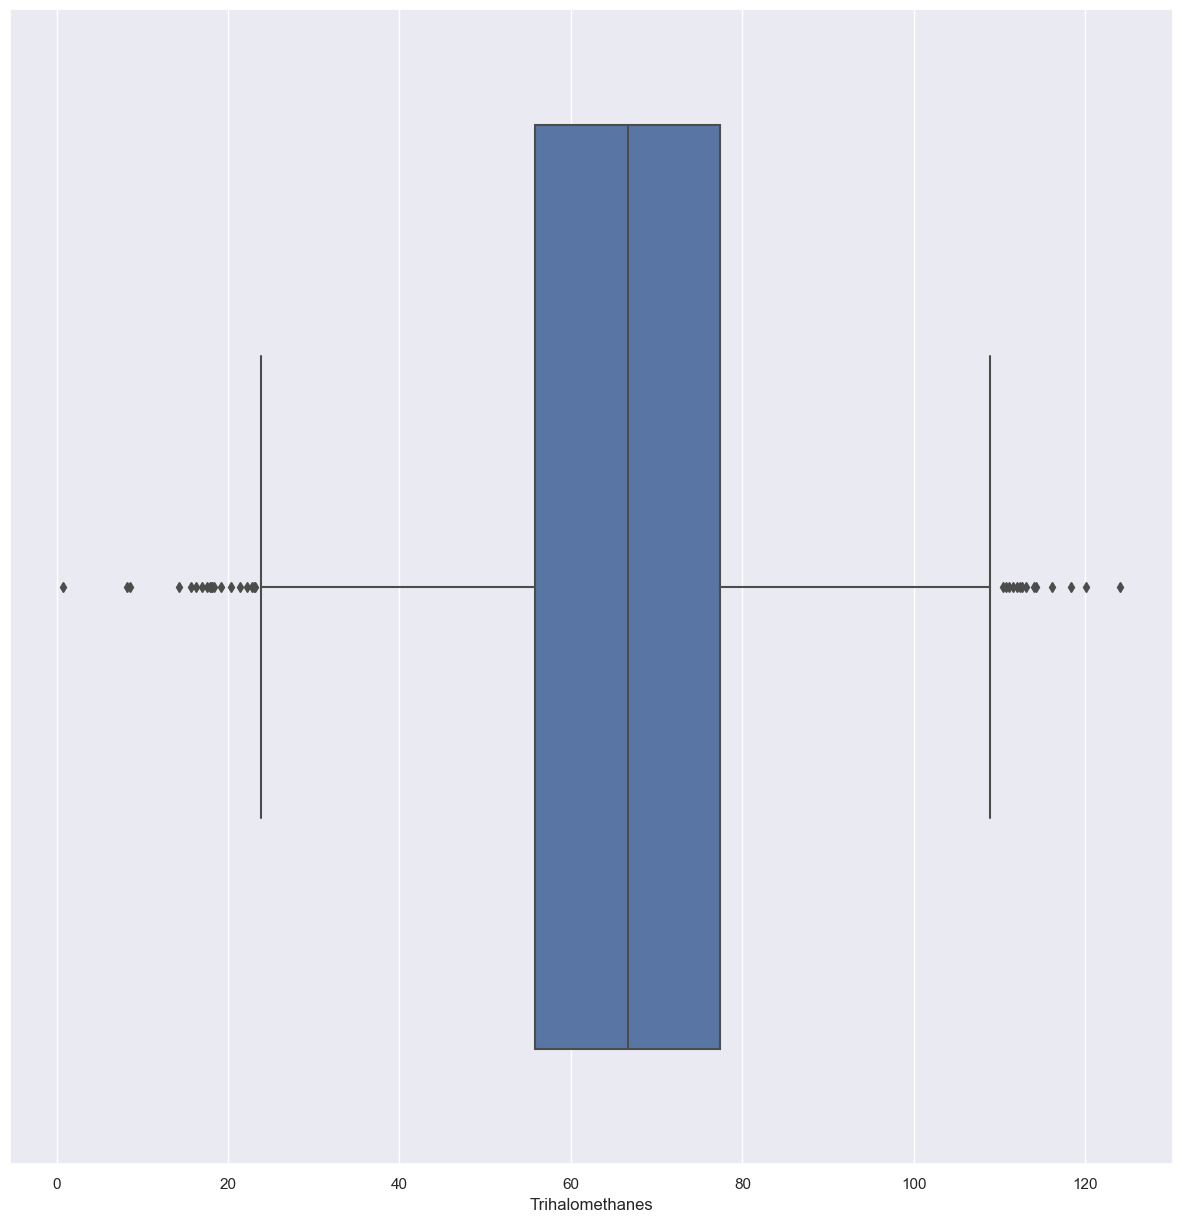

In [20]:
sns.boxplot(df['Trihalomethanes'])

<AxesSubplot:xlabel='Turbidity'>

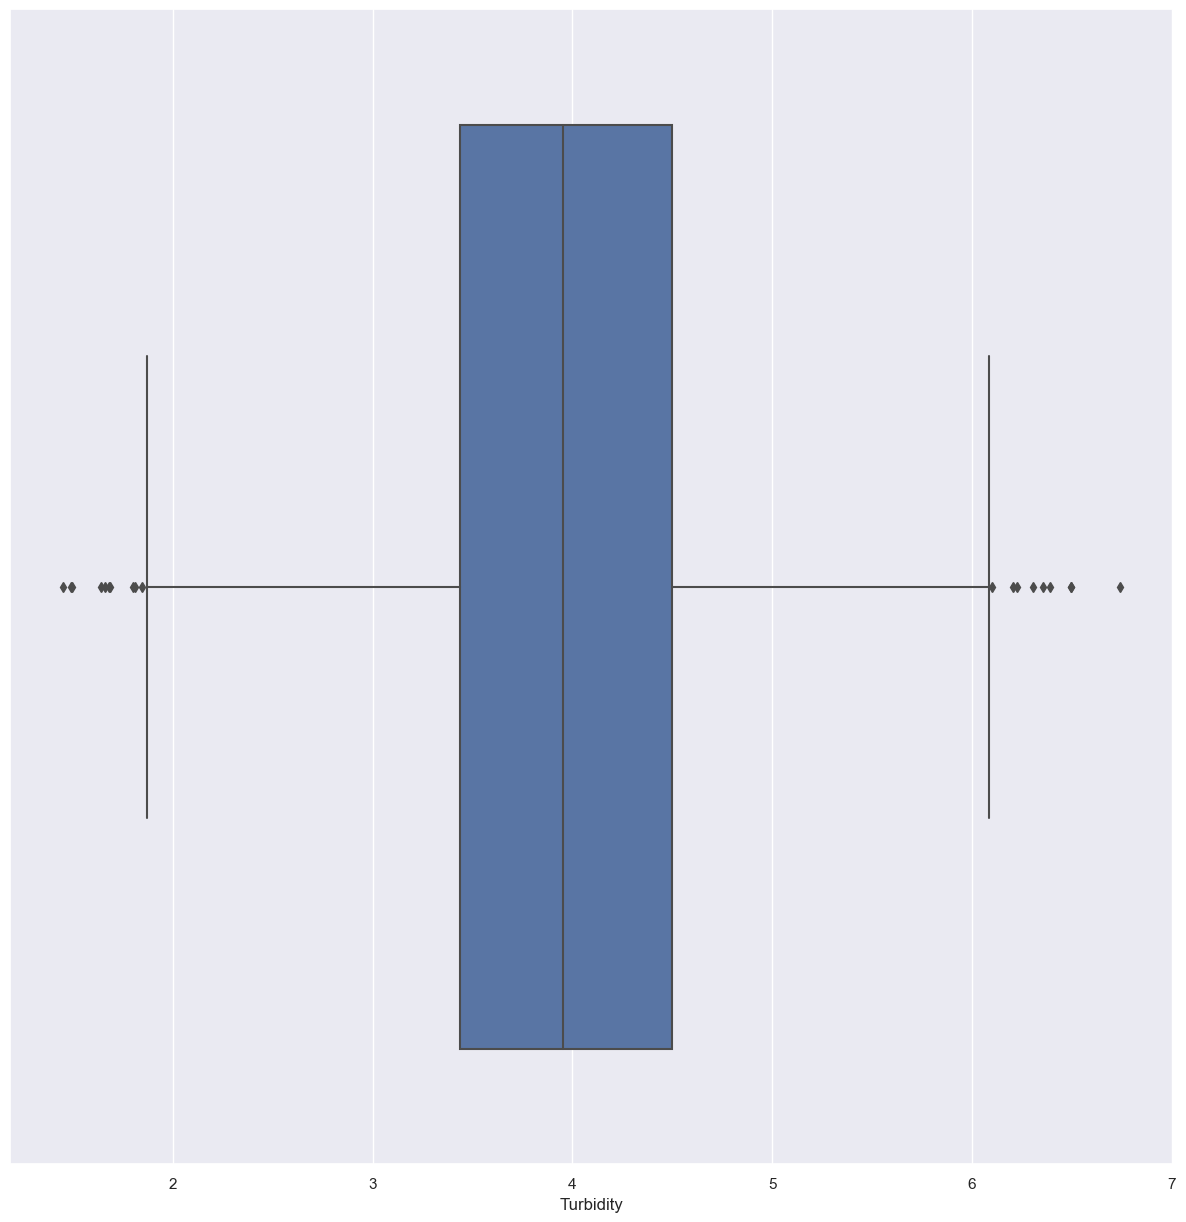

In [21]:
sns.boxplot(df['Turbidity'])

### ❱ `Number Of Outlires In Each Column`

In [22]:
for col in columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5*iqr
    upper_limit = q3 + 1.5*iqr
    l = len(df[(df[col]<lower_limit)|(df[col]>upper_limit)])
    print(f'number of outlires in {col}: {l}')

number of outlires in ph: 46
number of outlires in Hardness: 83
number of outlires in Solids: 47
number of outlires in Chloramines: 61
number of outlires in Sulfate: 41
number of outlires in Conductivity: 11
number of outlires in Organic_carbon: 25
number of outlires in Trihalomethanes: 33
number of outlires in Turbidity: 19


### ❱ `Deal With Outlires`

In [23]:
for col in columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5*iqr
    upper_limit = q3 + 1.5*iqr
    # deal
    df.loc[df[col] > upper_limit, col] = upper_limit 
    df.loc[df[col] < lower_limit, col] = lower_limit 

### ❱ `Number Of Outlires In Each Column After Delte Them. No Outlires :)`

In [24]:
for col in columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5*iqr
    upper_limit = q3 + 1.5*iqr
    l = len( df[(df[col]<lower_limit)|(df[col]>upper_limit)])
    print(f'number of outlires in {col}: {l}')

number of outlires in ph: 0
number of outlires in Hardness: 0
number of outlires in Solids: 0
number of outlires in Chloramines: 0
number of outlires in Sulfate: 0
number of outlires in Conductivity: 0
number of outlires in Organic_carbon: 0
number of outlires in Trihalomethanes: 0
number of outlires in Turbidity: 0


### ❱ `Box blot for some columns after removing outlires`

<AxesSubplot:xlabel='ph'>

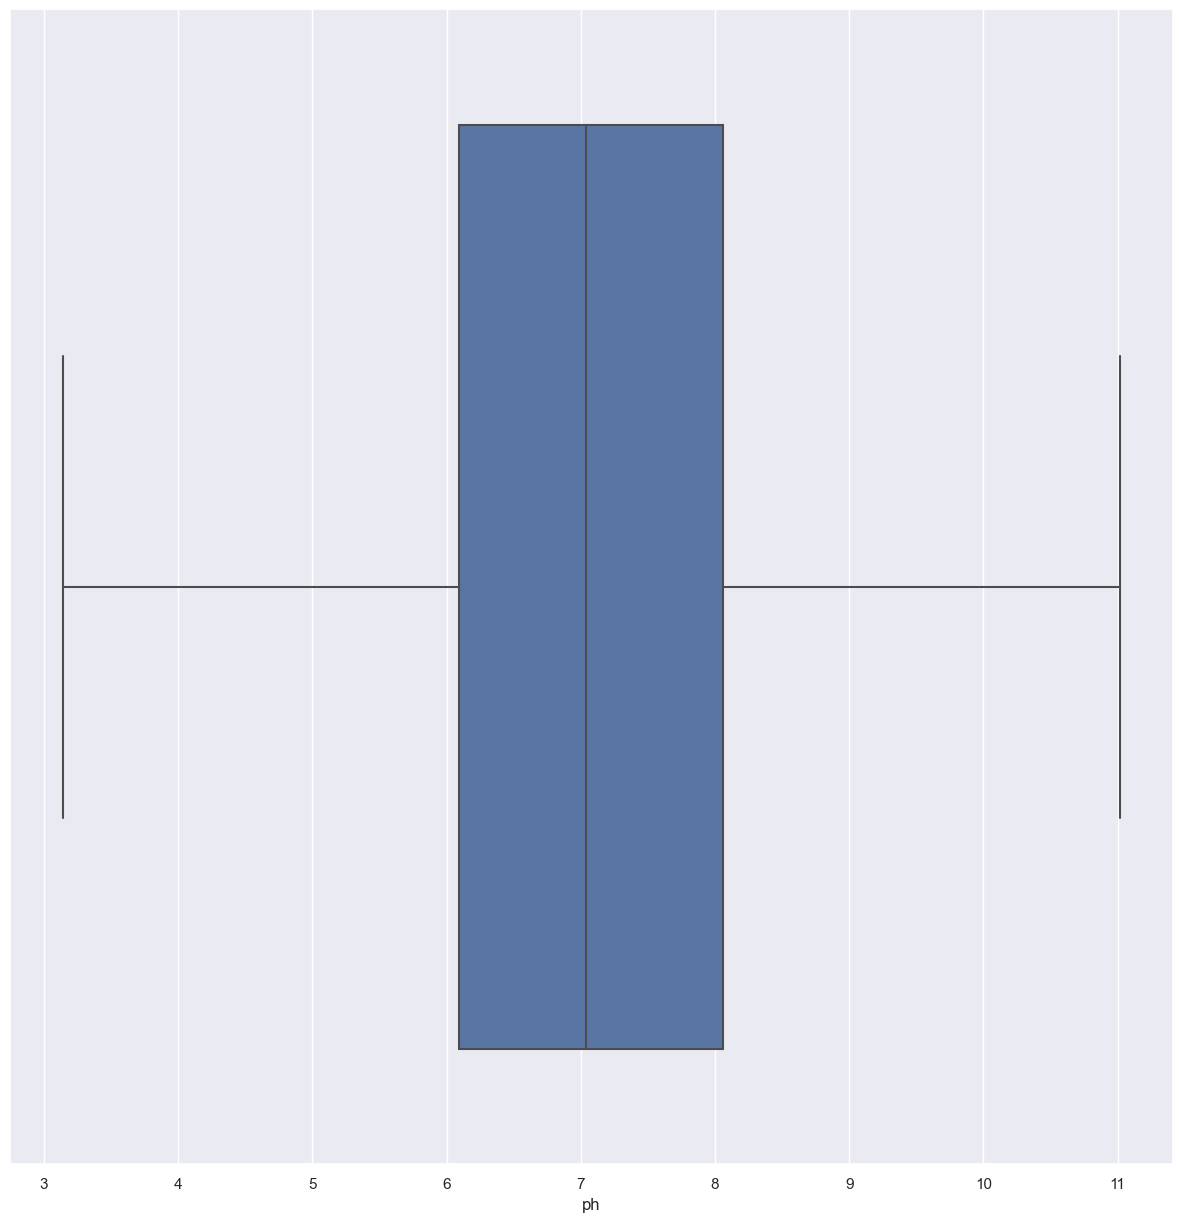

In [25]:
sns.boxplot(df['ph'])

<AxesSubplot:xlabel='Hardness'>

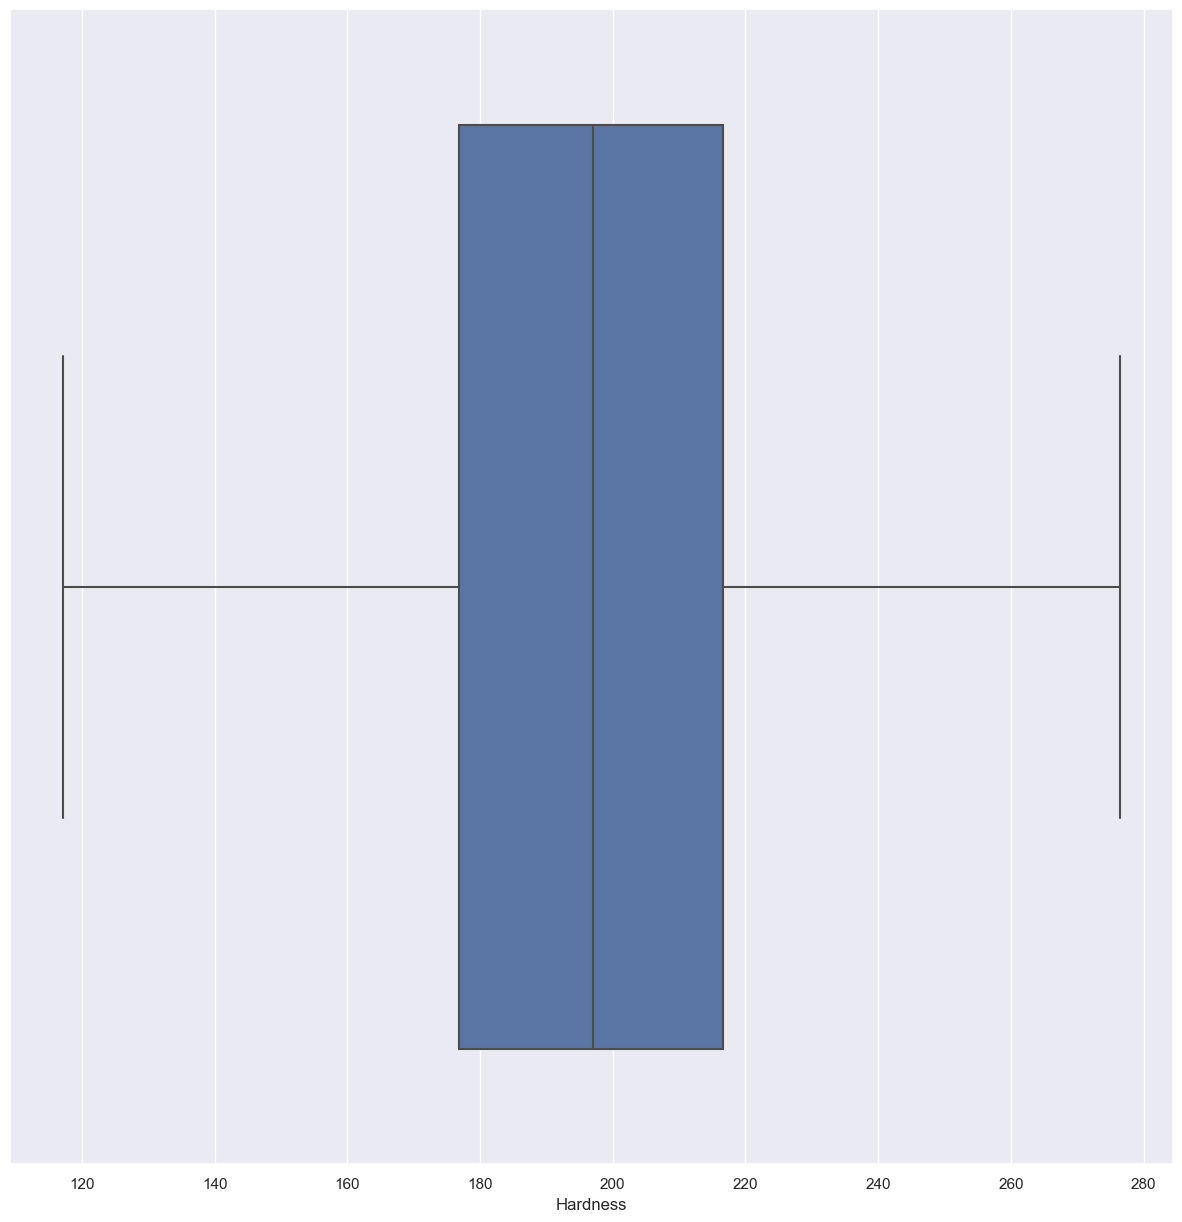

In [26]:
sns.boxplot(df['Hardness'])

<AxesSubplot:xlabel='Solids'>

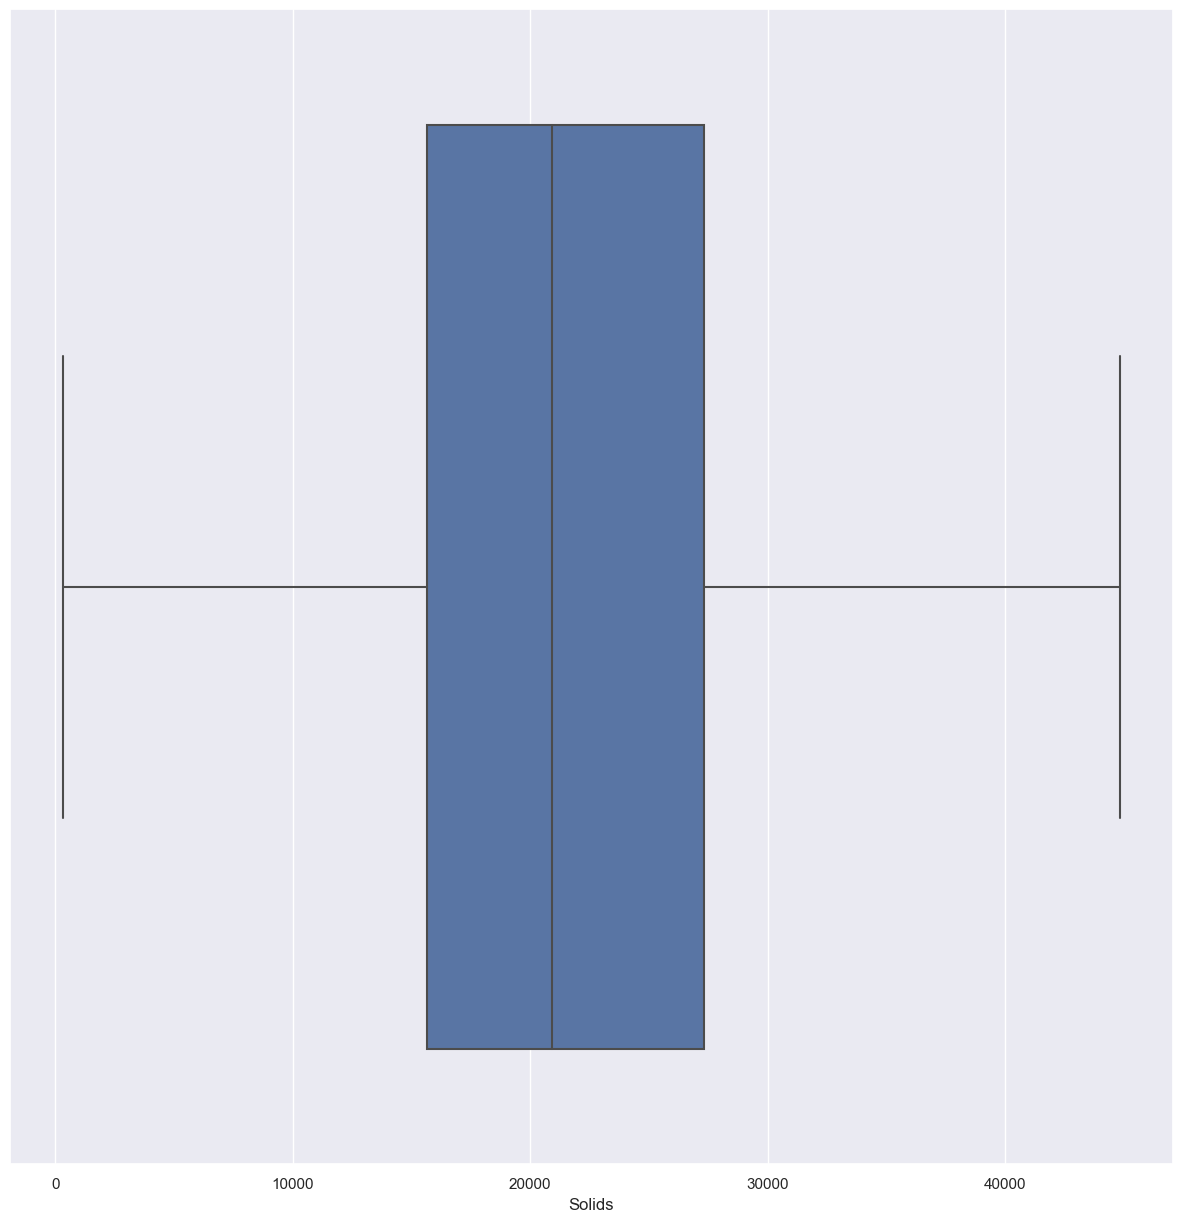

In [27]:
sns.boxplot(df['Solids'])

<AxesSubplot:xlabel='Chloramines'>

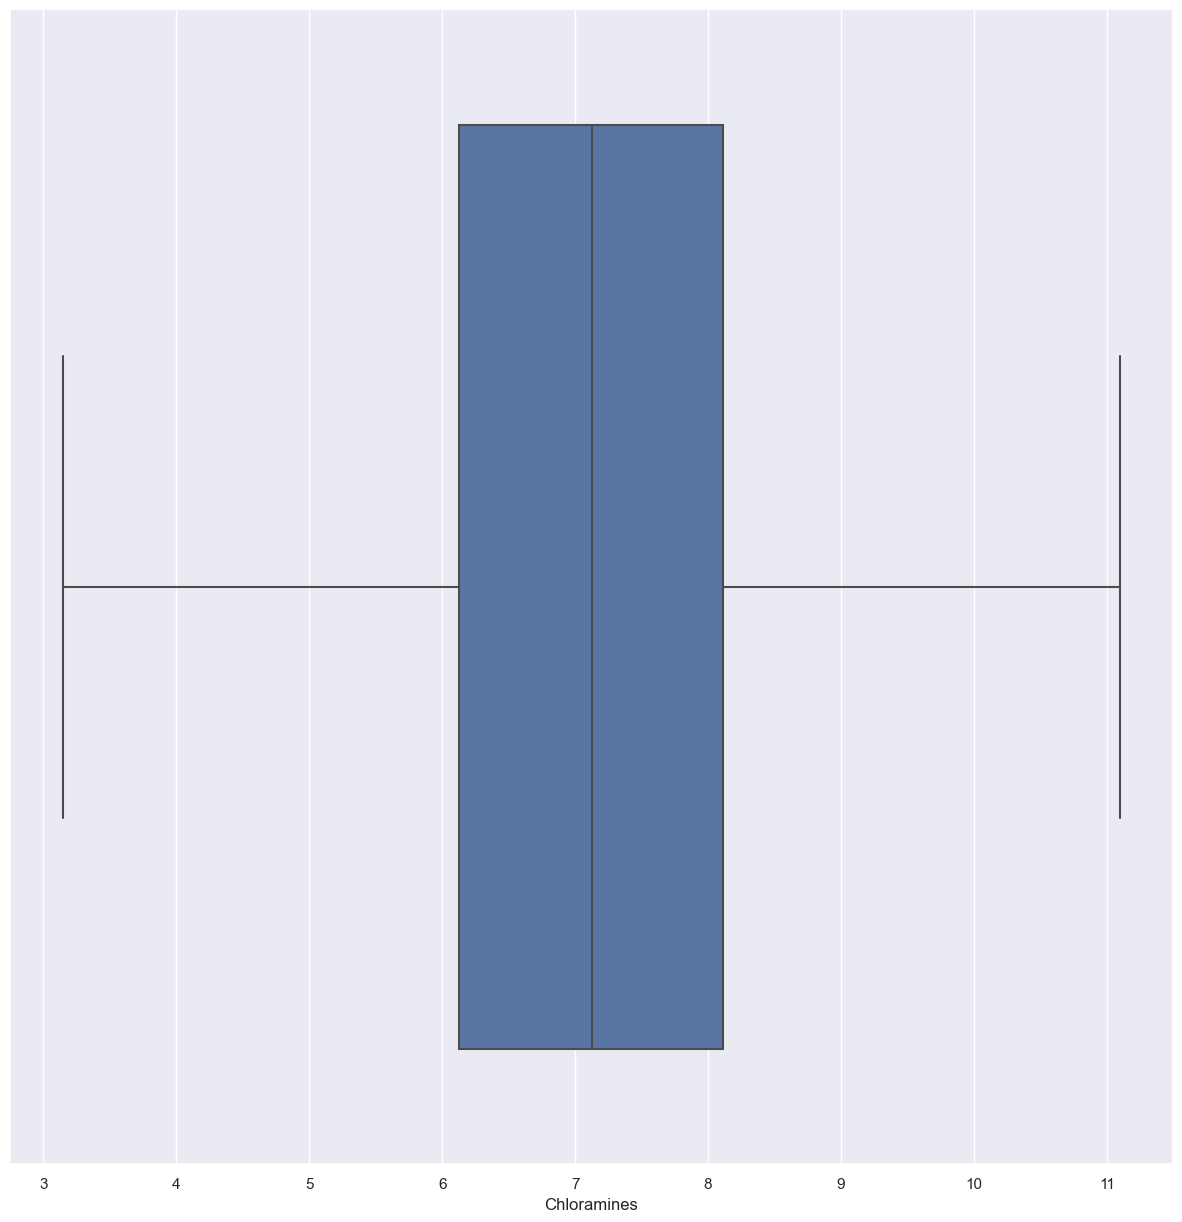

In [28]:
sns.boxplot(df['Chloramines'])

<AxesSubplot:xlabel='Sulfate'>

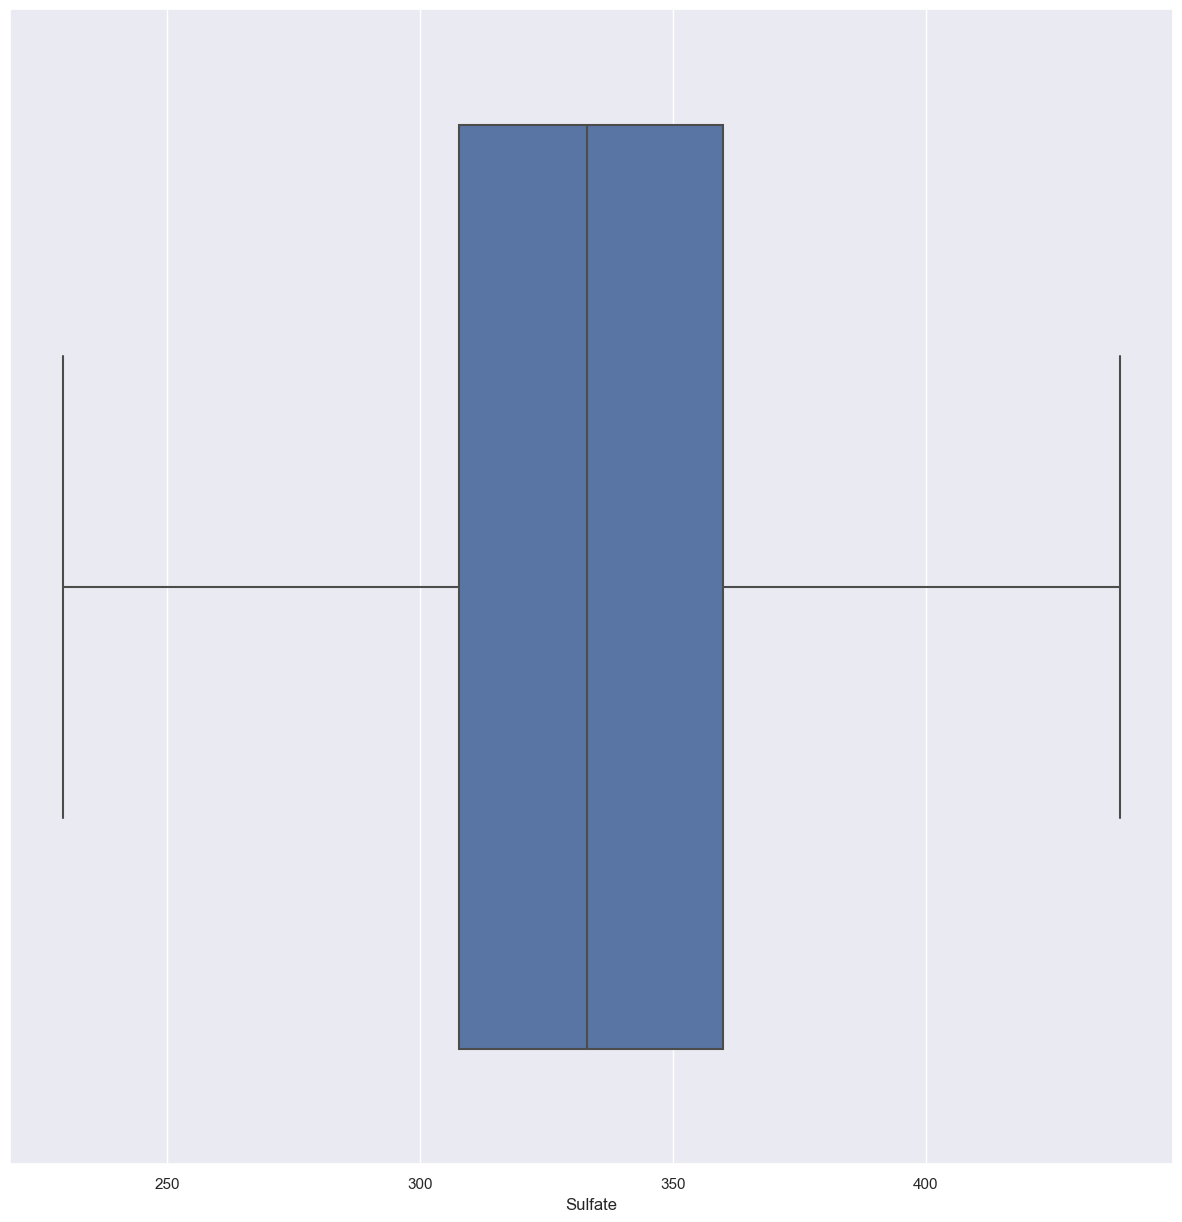

In [29]:
sns.boxplot(df['Sulfate'])

**` _________________________________________________________________________________________________________________`**

## 3.2 Missing Values

In [30]:
df.shape

(3276, 10)

In [31]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [32]:
missing_data_in_rows = df.isnull().any(axis=1)

In [33]:
num_of_rows_with_nan = missing_data_in_rows.sum()
num_of_rows_with_nan

1265

In [34]:
missing_data_in_rows.mean()

0.38614163614163616

> ### 3.2 Conclusions : 
> - **30% of rows have missing value so we should fill those cells with the mean of each column**

In [35]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.081738,196.392423,21957.112200,7.121794,333.867862,426.129974,14.283462,66.415219,3.966612,0.390110
std,1.549632,32.017189,8592.820397,1.544126,40.450271,80.564144,3.288367,15.990523,0.776409,0.487849
min,3.139631,117.125160,320.942611,3.146221,229.323489,191.647579,5.328026,23.605130,1.848797,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,11.015527,276.392834,44831.869873,11.096086,438.326179,655.879140,23.295427,109.576879,6.091233,1.000000


In [36]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


### ❱ `Get The Mean for Each Column`

In [37]:
columns_mean = df.mean(axis=0) # make sure that Quantity is column is int data type

### ❱ `Fill Null Values In Each Column With The Column Mean`

In [38]:
df.fillna(columns_mean, inplace=True)

In [39]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.081738,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.867862,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.867862,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


### ❱ `No Nulls :)`

In [40]:
df.isnull().any(axis=1).sum()

0

In [41]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

**` _________________________________________________________________________________________________________________`**

## 3.3 Duplicates

In [42]:
df.drop_duplicates(inplace = True)

In [43]:
df.shape

(3276, 10)

**` _________________________________________________________________________________________________________________`**

## 3.4 Feature scaling [Normalization]

In [44]:
#normalized_df=(df-df.mean())/df.std()
#normalized_df=(df-df.min())/(df.max()-df.min())
columns = ['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']
for col in columns:
    df[col] =( df[col]-df[col].min() ) / (df[col].max()-df[col].min())
    #df[col] =( df[col]-df[col].mean() ) / df[col].std()
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.500528,0.551055,0.459896,0.522523,0.665986,0.802748,0.281162,0.737287,0.262665,0
1,0.073192,0.077214,0.411340,0.438878,0.500206,0.864305,0.548326,0.380636,0.625079,0
2,0.629705,0.672523,0.440085,0.771040,0.500206,0.488891,0.642308,0.498012,0.284538,0
3,0.657339,0.610596,0.487464,0.618012,0.610340,0.369684,0.729571,0.892579,0.655278,0
4,0.755799,0.401691,0.396713,0.427728,0.386656,0.445388,0.346753,0.097623,0.524764,0


**` _________________________________________________________________________________________________________________`**

## 3.5 Observation 

<AxesSubplot:>

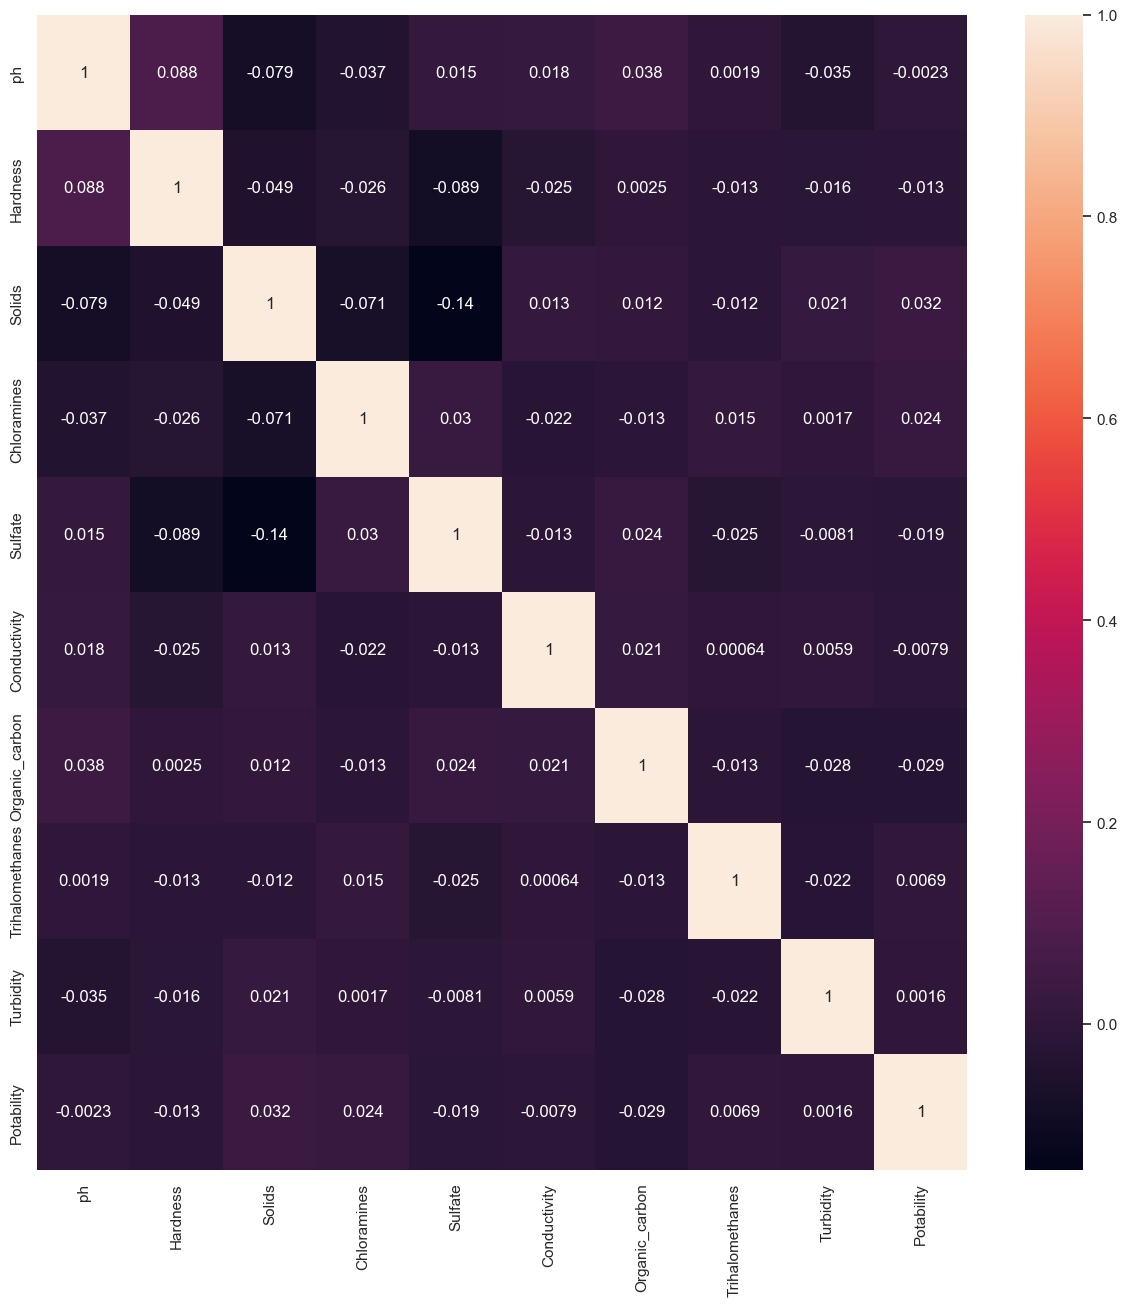

In [46]:
sns.heatmap(df.corr(), annot=True)

**` _________________________________________________________________________________________________________________`**

## 3.6 Output cleaned data

In [44]:
df.to_csv('Preprocessed_Data.csv')

In [45]:
df = pd.read_csv('Cleaned_Data.csv')

**` _________________________________________________________________________________________________________________`**

![separator2](https://i.imgur.com/4gX5WFr.png)

# Task 4: creat a model that fits the data

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X=df.iloc[:,df.columns != 'Potability'].values
y=df['Potability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)
model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

![separator2](https://i.imgur.com/4gX5WFr.png)

# Task 5: creating an accurecy table

In [47]:
from sklearn.metrics import accuracy_score
y_preds=model.predict(X_test)
print(f"Testing score = {accuracy_score(y_test,y_preds)}")

Testing score = 0.9935897435897436


In [48]:
y_preds=model.predict(X_train)
print(f"Testing score = {accuracy_score(y_train,y_preds)}")

Testing score = 0.9981684981684982


![separator2](https://i.imgur.com/4gX5WFr.png)